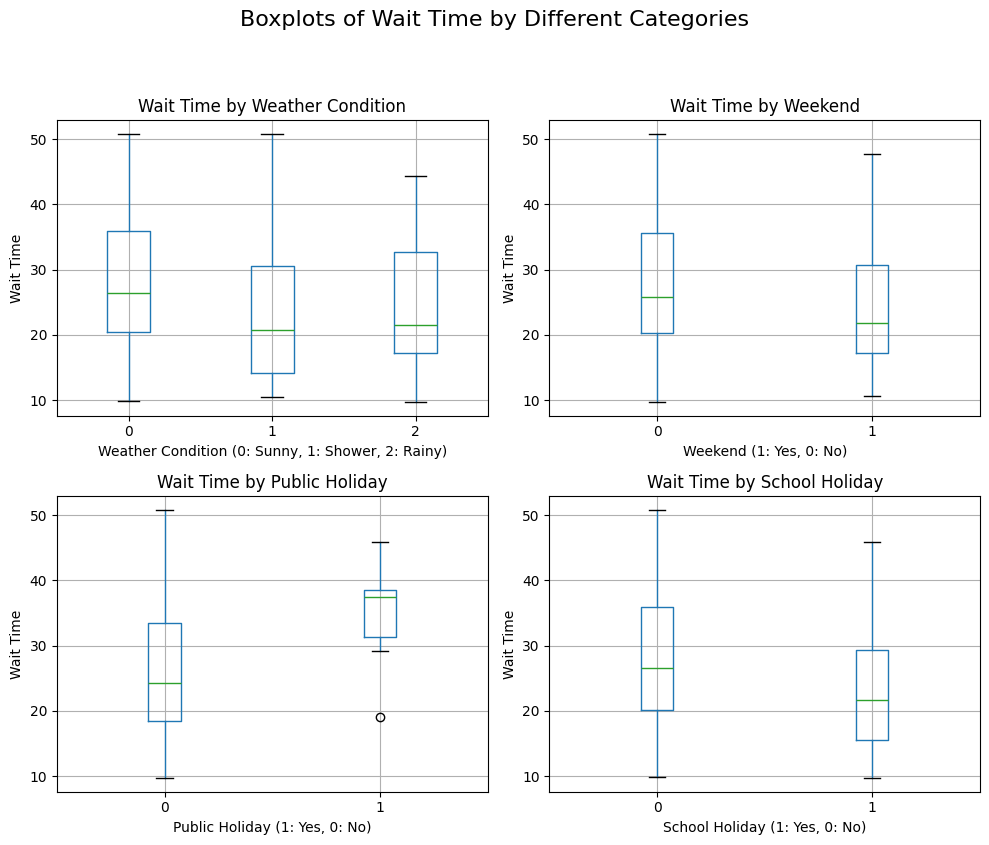

T-test result for Weather Condition (ANOVA for multiple groups):
F-statistic: 3.804241692991887, p-value: 0.023323191274282184

T-test result for Weekend (Weekend vs. Working day):
t-statistic: -2.1952990958729806, p-value: 0.028880778760656162

T-test result for Public Holiday (Public Holiday vs. Non-Public Holiday):
t-statistic: 2.887042549943655, p-value: 0.004161208344213392

T-test result for School Holiday (School Holiday vs. Non-School Holiday):
t-statistic: -3.835754467659283, p-value: 0.000151571657352721



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

weather_df = pd.read_csv('../data/2023_daily_weather_with_wait_times_and_conditions.csv')

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

weather_df.boxplot(column='Wait Time', by='Weather Condition', ax=axs[0, 0])
axs[0, 0].set_title('Wait Time by Weather Condition')
axs[0, 0].set_xlabel('Weather Condition (0: Sunny, 1: Shower, 2: Rainy)')
axs[0, 0].set_ylabel('Wait Time')

weather_df.boxplot(column='Wait Time', by='Weekend', ax=axs[0, 1])
axs[0, 1].set_title('Wait Time by Weekend')
axs[0, 1].set_xlabel('Weekend (1: Yes, 0: No)')
axs[0, 1].set_ylabel('Wait Time')

weather_df.boxplot(column='Wait Time', by='Public Holiday', ax=axs[1, 0])
axs[1, 0].set_title('Wait Time by Public Holiday')
axs[1, 0].set_xlabel('Public Holiday (1: Yes, 0: No)')
axs[1, 0].set_ylabel('Wait Time')

weather_df.boxplot(column='Wait Time', by='School Holiday', ax=axs[1, 1])
axs[1, 1].set_title('Wait Time by School Holiday')
axs[1, 1].set_xlabel('School Holiday (1: Yes, 0: No)')
axs[1, 1].set_ylabel('Wait Time')

plt.tight_layout()
plt.suptitle('Boxplots of Wait Time by Different Categories', fontsize=16, y=1.05)  # Title for the whole figure

plt.show()

# T-test for Wait Time by Weather Condition (Sunny, Shower, Rainy)
weather_conditions = weather_df['Weather Condition'].unique()  # Unique weather condition values
weather_condition_groups = [weather_df[weather_df['Weather Condition'] == condition]['Wait Time'] for condition in weather_conditions]

# Perform ANOVA (F-test) for Weather Condition
weather_ttest_result = stats.f_oneway(*weather_condition_groups)
print("T-test result for Weather Condition (ANOVA for multiple groups):")
print(f"F-statistic: {weather_ttest_result.statistic}, p-value: {weather_ttest_result.pvalue}\n")

# T-test for Wait Time by Weekend (Weekend vs. Working day)
weekend_groups = [weather_df[weather_df['Weekend'] == 1]['Wait Time'], weather_df[weather_df['Weekend'] == 0]['Wait Time']]
weekend_ttest_result = stats.ttest_ind(*weekend_groups)
print("T-test result for Weekend (Weekend vs. Working day):")
print(f"t-statistic: {weekend_ttest_result.statistic}, p-value: {weekend_ttest_result.pvalue}\n")

# T-test for Wait Time by Public Holiday (Public Holiday vs. Non-Public Holiday)
public_holiday_groups = [weather_df[weather_df['Public Holiday'] == 1]['Wait Time'], weather_df[weather_df['Public Holiday'] == 0]['Wait Time']]
public_holiday_ttest_result = stats.ttest_ind(*public_holiday_groups)
print("T-test result for Public Holiday (Public Holiday vs. Non-Public Holiday):")
print(f"t-statistic: {public_holiday_ttest_result.statistic}, p-value: {public_holiday_ttest_result.pvalue}\n")

# T-test for Wait Time by School Holiday (School Holiday vs. Non-School Holiday)
school_holiday_groups = [weather_df[weather_df['School Holiday'] == 1]['Wait Time'], weather_df[weather_df['School Holiday'] == 0]['Wait Time']]
school_holiday_ttest_result = stats.ttest_ind(*school_holiday_groups)
print("T-test result for School Holiday (School Holiday vs. Non-School Holiday):")
print(f"t-statistic: {school_holiday_ttest_result.statistic}, p-value: {school_holiday_ttest_result.pvalue}\n")
